In [1]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
# importing algorithm functions
import sys
sys.path.insert(1, '/Users/emicervantes/Desktop/gko-23/scripts/functions')
from gk import gk
from mwrko import mwrko
from gko import gko

### Experiment 1: Gaussian System

$X \sim \mathcal{N}(0,\,1)$

In [7]:
# setting up data
A = np.random.randn(5000,500)
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [8]:
# gk
gk_start_cyclic_gauss = process_time()
gk_gaussian = gk(A,x,y, 10**-4)
gk_stop_cyclic_gauss = process_time()
# gko
gko_start_cyclic_gauss = process_time()
gko_gaussian = gk(A,x,y, 10**-4)
gko_stop_cyclic_gauss = process_time()
# mwrko
mwrko_start_cyclic_gauss = process_time()
mwrko_gaussian = mwrko(A,x,y,10**-4)
mwrko_stop_cyclic_gauss = process_time()

In [9]:
# cpu data
gk_cpu_gauss = gk_stop_cyclic_gauss - gk_start_cyclic_gauss
gko_cpu_gauss = gko_stop_cyclic_gauss - gko_start_cyclic_gauss
mwrko_cpu_gauss = mwrko_stop_cyclic_gauss - mwrko_start_cyclic_gauss

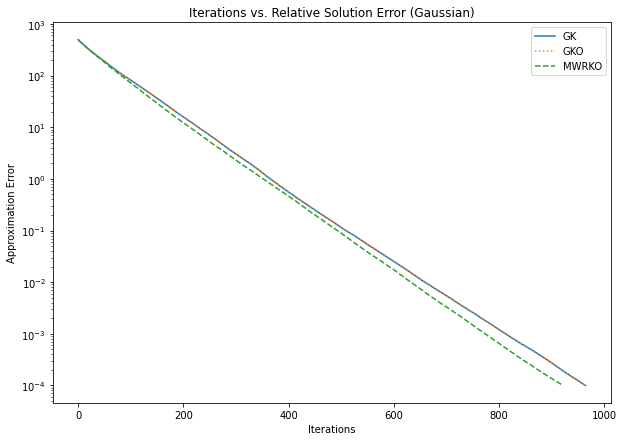

In [10]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1],linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Relative Solution Error (Gaussian)')
plt.legend()

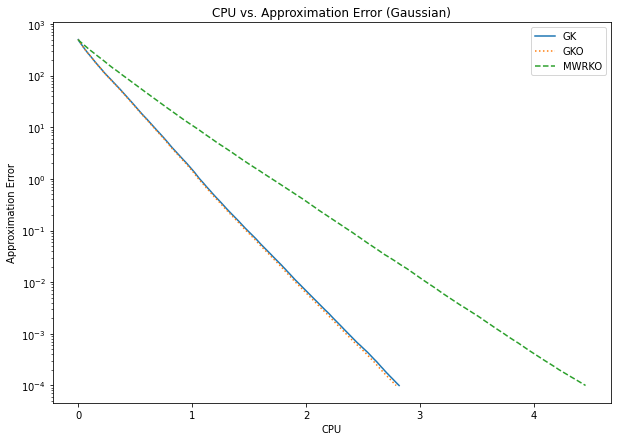

In [11]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_gauss,gk_gaussian[0]), gk_gaussian[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_gauss,gko_gaussian[0]), gko_gaussian[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_gauss,mwrko_gaussian[0]), mwrko_gaussian[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (Gaussian)')
plt.legend()

### Experiment 2: Uniform System

$X \sim \text{Unif}(0,\,1)$

In [12]:
#uniform
A = np.random.rand(5000,500)
x = np.ones(500)
y = A @ x

In [13]:
# gk
gk_start_cyclic = process_time()
gk_uniform = gk(A,x,y,10**-4)
gk_stop_cyclic = process_time()
# gko
gko_start_cyclic = process_time()
gko_uniform = gko(A,x,y,10**-4)
gko_stop_cyclic = process_time()
# mwrko
mwrko_start_cyclic = process_time()
mwrko_uniform = mwrko(A,x,y,10**-4)
mwrko_stop_cyclic = process_time()

In [14]:
# cpu data
gk_cpu = gk_stop_cyclic - gk_start_cyclic
gko_cpu = gko_stop_cyclic - gko_start_cyclic
mwrko_cpu = mwrko_stop_cyclic - mwrko_start_cyclic

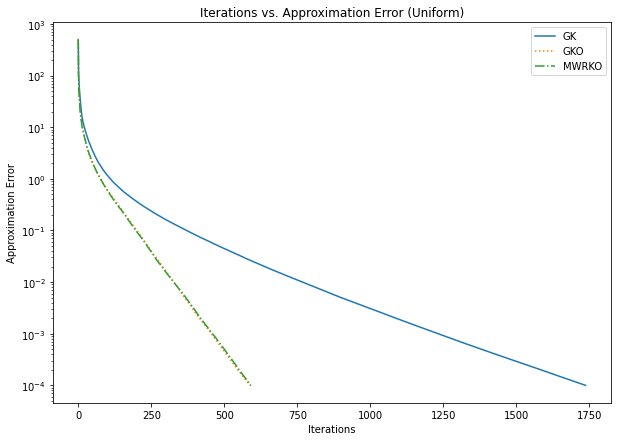

In [15]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_uniform[0]), gko_uniform[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashdot', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

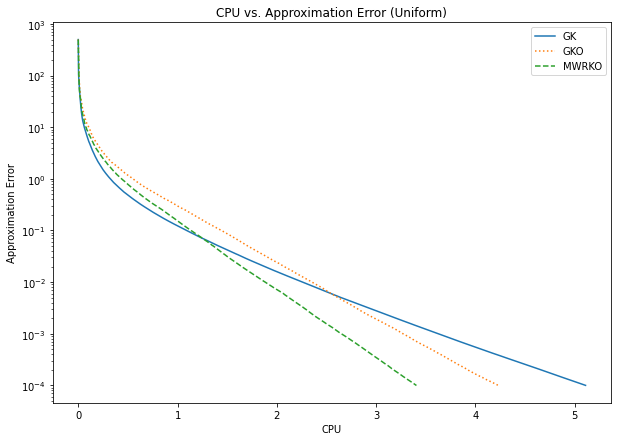

In [16]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu,gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu,gko_uniform[0]), gko_uniform[1],linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu,mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (Uniform)')
plt.legend()

### 50/50 Gauss-Uniform

In [17]:
#combination
A1 = np.random.rand(2500,500)
A2 = np.random.randn(2500,500)
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [18]:
# gk
gk_start_cyclic_comb = process_time()
gk_comb = gk(A,x,y, 10**-4)
gk_stop_cyclic_comb = process_time()
# gko
gko_start_cyclic_comb = process_time()
gko_comb = gk(A,x,y, 10**-4)
gko_stop_cyclic_comb = process_time()
# mwrko
mwrko_start_cyclic_comb = process_time()
mwrko_comb = mwrko(A,x,y,10**-4)
mwrko_stop_cyclic_comb = process_time()

In [19]:
# cpu data
gk_cpu_comb = gk_stop_cyclic_comb - gk_start_cyclic_comb
gko_cpu_comb = gko_stop_cyclic_comb - gko_start_cyclic_comb
mwrko_cpu_comb = mwrko_stop_cyclic_comb - mwrko_start_cyclic_comb

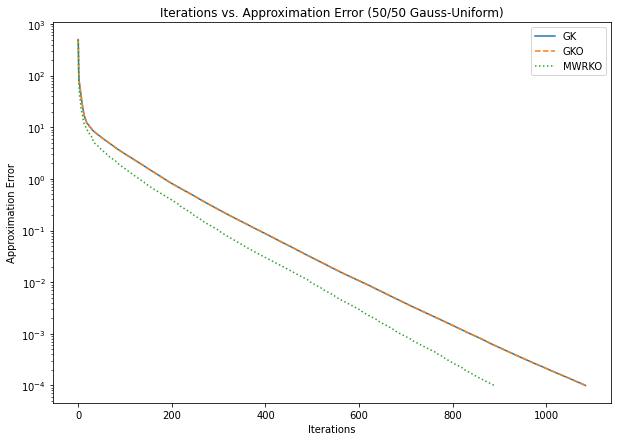

In [20]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_comb[0]), gko_comb[1], linestyle = 'dashed', label = 'GKO')
plt.semilogy(np.arange(mwrko_comb[0]), mwrko_comb[1], linestyle = 'dotted', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gauss-Uniform)')
plt.legend()

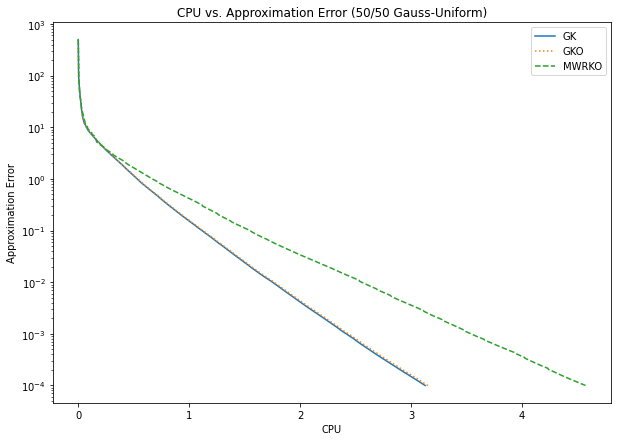

In [21]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_comb,gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_comb,gko_comb[0]), gko_comb[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_comb,mwrko_comb[0]), mwrko_comb[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (50/50 Gauss-Uniform)')
plt.legend()

### Overall Results

<Figure size 7200x5040 with 0 Axes>

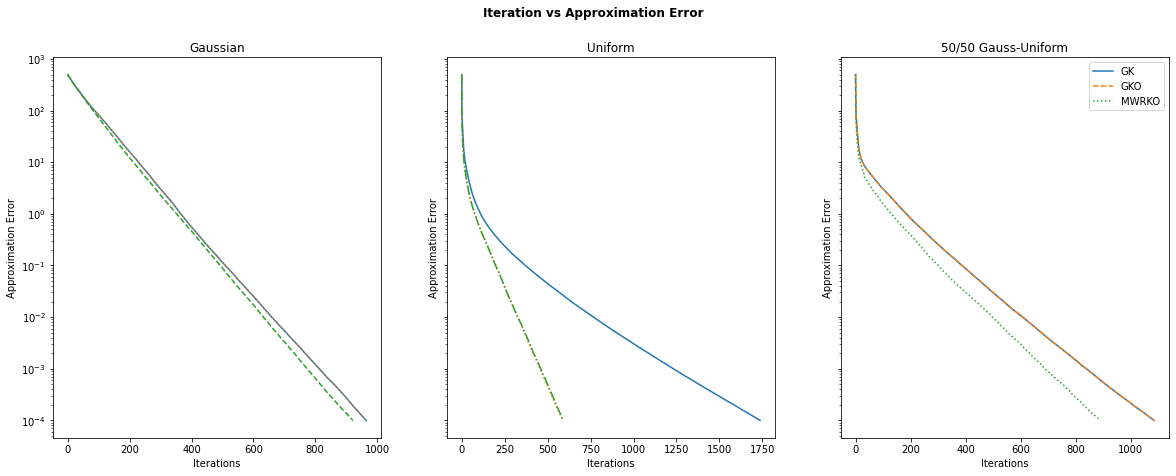

In [22]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1],linestyle = 'solid', label = 'GK')
ax1.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1],linestyle = 'dotted', label = 'GKO')
ax1.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1],linestyle = 'dashed', label = 'MWRKO')
ax1.set(xlabel='Iterations', ylabel='Approximation Error', title='Gaussian')

ax2.semilogy(np.arange(gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
ax2.semilogy(np.arange(gko_uniform[0]), gko_uniform[1], linestyle = 'dotted', label = 'GKO')
ax2.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashdot', label = 'MWRKO')
ax2.set(xlabel='Iterations', ylabel='Approximation Error', title='Uniform')

ax3.semilogy(np.arange(gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
ax3.semilogy(np.arange(gko_comb[0]), gko_comb[1], linestyle = 'dashed', label = 'GKO')
ax3.semilogy(np.arange(mwrko_comb[0]), mwrko_comb[1], linestyle = 'dotted', label = 'MWRKO')
ax3.set(xlabel='Iterations', ylabel='Approximation Error', title='50/50 Gauss-Uniform')

plt.legend()
fig.suptitle("Iteration vs Approximation Error", weight = 'bold')
plt.show()

<Figure size 7200x5040 with 0 Axes>

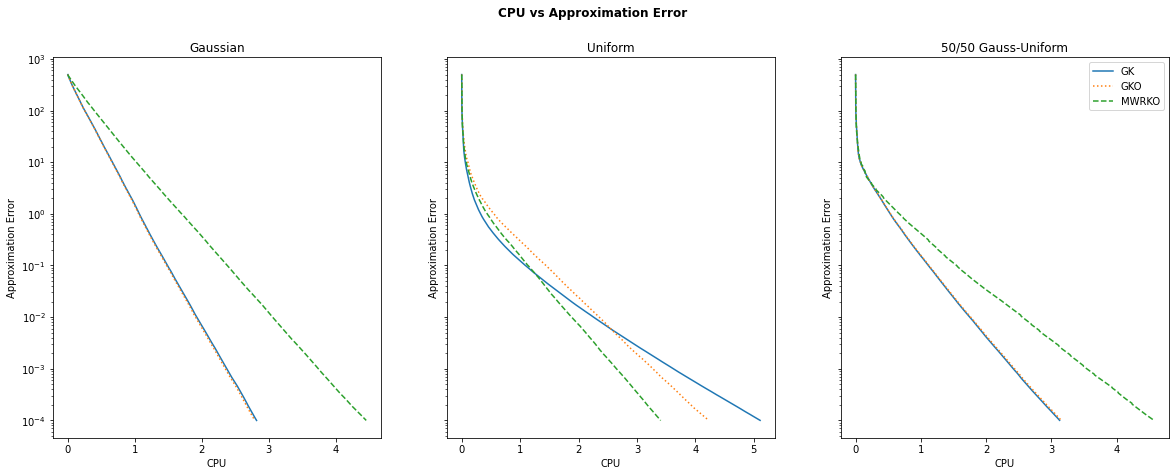

In [23]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.linspace(0,gk_cpu_gauss,gk_gaussian[0]), gk_gaussian[1],linestyle = 'solid', label = 'GK')
ax1.semilogy(np.linspace(0,gko_cpu_gauss,gko_gaussian[0]), gko_gaussian[1], linestyle = 'dotted', label = 'GKO')
ax1.semilogy(np.linspace(0,mwrko_cpu_gauss,mwrko_gaussian[0]), mwrko_gaussian[1],linestyle = 'dashed', label = 'MWRKO')
ax1.set(xlabel='CPU', ylabel='Approximation Error', title='Gaussian')

ax2.semilogy(np.linspace(0,gk_cpu,gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
ax2.semilogy(np.linspace(0,gko_cpu,gko_uniform[0]), gko_uniform[1],linestyle = 'dotted', label = 'GKO')
ax2.semilogy(np.linspace(0,mwrko_cpu,mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashed', label = 'MWRKO')
ax2.set(xlabel='CPU', ylabel='Approximation Error', title='Uniform')

ax3.semilogy(np.linspace(0,gk_cpu_comb,gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
ax3.semilogy(np.linspace(0,gko_cpu_comb,gko_comb[0]), gko_comb[1], linestyle = 'dotted', label = 'GKO')
ax3.semilogy(np.linspace(0,mwrko_cpu_comb,mwrko_comb[0]), mwrko_comb[1], linestyle = 'dashed', label = 'MWRKO')
ax3.set(xlabel='CPU', ylabel='Approximation Error', title='50/50 Gauss-Uniform')

plt.legend()
fig.suptitle("CPU vs Approximation Error", weight = 'bold')
plt.show()